## Nonlinear numerical schemes using specular differentiation for initial value problems for first-order ordinary differential equations

In [1]:
import specular
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tools import error_analysis

### Figure 1

Running specular trigonometric scheme: 100%|██████████| 24/24 [00:00<?, ?it/s]


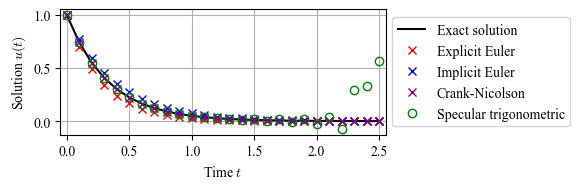

In [2]:
t_0 = 0.0
T = 2.5
h = 0.1

def F(t, u):
    return -3*u 

def exact_sol(t):
    return np.exp(-3*t)

def u_0(t_0):
    return exact_sol(t_0)

u_1 = exact_sol(t_0 + h)

result_EE = specular.ode.solver.classical_scheme(F, t_0=t_0, u_0=u_0, T=T, h=h, form="explicit Euler").history()
result_IE = specular.ode.solver.classical_scheme(F, t_0=t_0, u_0=u_0, T=T, h=h, form="implicit Euler").history()
result_CN = specular.ode.solver.classical_scheme(F, t_0=t_0, u_0=u_0, T=T, h=h, form="Crank-Nicolson").history()
result_ST = specular.trigonometric_scheme(F, t_0=t_0, u_0=u_0, u_1=u_1, T=T, h=h).history()

exact_solution = np.array([exact_sol(t) for t in result_EE[0]])

plt.figure(figsize=(6, 2))
           
plt.plot(result_EE[0], exact_solution, color='black', label='Exact solution') 

plt.plot(result_EE[0], result_EE[1],  marker='x', linestyle='None',
         markerfacecolor='none', 
         markeredgecolor='red',  
         label='Explicit Euler') 

plt.plot(result_IE[0], result_IE[1],  marker='x', linestyle='None',
         markerfacecolor='none',  
         markeredgecolor='blue',  
         label='Implicit Euler')  

plt.plot(result_CN[0], result_CN[1],  marker='x', linestyle='None',
         markerfacecolor='none',  
         markeredgecolor='purple',
         label='Crank-Nicolson')  

plt.plot(result_ST[0], result_ST[1],  marker='o', linestyle='None',
         markerfacecolor='none',  
         markeredgecolor='green',  
         label='Specular trigonometric')

plt.xlabel(r"Time $t$", fontsize=10)
plt.ylabel(r"Solution $u(t)$", fontsize=10)
plt.xlim(-0.05, 2.55)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0., fontsize=10)
plt.tight_layout()
plt.savefig(f'figures/ex1.pdf', dpi=1000, bbox_inches='tight')
plt.show()

### Figure 2

Running specular trigonometric scheme: 100%|██████████| 19/19 [00:00<00:00, 19005.91it/s]


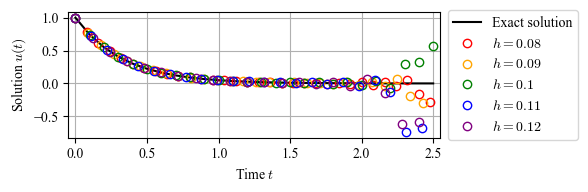

In [3]:
t_0 = 0.0
T = 2.5
max_iter = 1000

def F(t, u):
    return -3*u 

def exact_sol(t):
    return np.exp(-3*t)

def u_0(t_0):
    return exact_sol(t_0)

result_ST_08 = specular.trigonometric_scheme(F, t_0=t_0, u_0=u_0, u_1=exact_sol(t_0 + 0.08), T=T, h=0.08).history()
result_ST_09 = specular.trigonometric_scheme(F, t_0=t_0, u_0=u_0, u_1=exact_sol(t_0 + 0.09), T=T, h=0.09).history()
result_ST_10 = specular.trigonometric_scheme(F, t_0=t_0, u_0=u_0, u_1=exact_sol(t_0 + 0.10), T=T, h=0.10).history()
result_ST_11 = specular.trigonometric_scheme(F, t_0=t_0, u_0=u_0, u_1=exact_sol(t_0 + 0.11), T=T, h=0.11).history()
result_ST_12 = specular.trigonometric_scheme(F, t_0=t_0, u_0=u_0, u_1=exact_sol(t_0 + 0.12), T=T, h=0.12).history()

exact_solution = np.array([exact_sol(t) for t in result_ST_10[0]])

plt.figure(figsize=(6, 2))
           
plt.plot(result_ST_10[0], exact_solution, color='black', label='Exact solution') 

plt.plot(result_ST_08[0], result_ST_08[1],  marker='o', linestyle='None',
         markerfacecolor='none',  
         markeredgecolor='red',  
         label='$h = 0.08$')

plt.plot(result_ST_09[0], result_ST_09[1],  marker='o', linestyle='None',
         markerfacecolor='none',  
         markeredgecolor='orange',  
         label='$h = 0.09$')

plt.plot(result_ST_10[0], result_ST_10[1],  marker='o', linestyle='None',
         markerfacecolor='none',  
         markeredgecolor='green',  
         label='$h = 0.1$')

plt.plot(result_ST_11[0], result_ST_11[1],  marker='o', linestyle='None',
         markerfacecolor='none',  
         markeredgecolor='blue',  
         label='$h = 0.11$')

plt.plot(result_ST_12[0], result_ST_12[1],  marker='o', linestyle='None',
         markerfacecolor='none',  
         markeredgecolor='purple',  
         label='$h = 0.12$')

plt.xlabel(r"Time $t$", fontsize=10)
plt.ylabel(r"Solution $u(t)$", fontsize=10)
plt.xlim(-0.05, 2.55)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0., fontsize=10)
plt.tight_layout()
plt.savefig(f'figures/ex2.pdf', dpi=1000, bbox_inches='tight')
plt.show()

### Figure 3

Running specular trigonometric scheme: 100%|██████████| 199/199 [00:00<?, ?it/s]


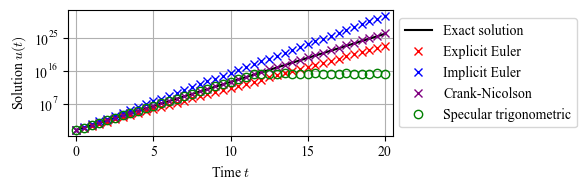

In [4]:
t_0 = 0.0
T = 20.0
h = 0.1

def F(t, u):
    return 3*u 

def exact_sol(t):
    return np.exp(3*t)

def u_0(t_0):
    return exact_sol(t_0)

u_1 = exact_sol(t_0 + h)

result_EE = specular.ode.solver.classical_scheme(F, t_0=t_0, u_0=u_0, T=T, h=h, form="explicit Euler").history()
result_IE = specular.ode.solver.classical_scheme(F, t_0=t_0, u_0=u_0, T=T, h=h, form="implicit Euler").history()
result_CN = specular.ode.solver.classical_scheme(F, t_0=t_0, u_0=u_0, T=T, h=h, form="Crank-Nicolson").history()
result_ST = specular.trigonometric_scheme(F, t_0=t_0, u_0=u_0, u_1=u_1, T=T, h=h).history()


exact_solution = np.array([exact_sol(t) for t in result_EE[0]])

visual_percentage = 0.2
step = max(1, int(len(result_EE[0]) / (len(result_EE[0]) * visual_percentage)))

plt.figure(figsize=(6, 2))
           
plt.plot(result_EE[0][::step], exact_solution[::step], color='black', label='Exact solution') 

plt.plot(result_EE[0][::step], result_EE[1][::step],  marker='x', linestyle='None',
         markerfacecolor='none', 
         markeredgecolor='red',  
         label='Explicit Euler') 

plt.plot(result_IE[0][::step], result_IE[1][::step],  marker='x', linestyle='None',
         markerfacecolor='none',  
         markeredgecolor='blue',  
         label='Implicit Euler')  

plt.plot(result_CN[0][::step], result_CN[1][::step],  marker='x', linestyle='None',
         markerfacecolor='none',  
         markeredgecolor='purple',
         label='Crank-Nicolson')  

plt.plot(result_ST[0][::step], result_ST[1][::step],  marker='o', linestyle='None',
         markerfacecolor='none',  
         markeredgecolor='green',  
         label='Specular trigonometric')

plt.xlabel(r"Time $t$", fontsize=10)
plt.ylabel(r"Solution $u(t)$", fontsize=10)
plt.xlim(-0.5, 20.5)
plt.grid(True)
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0., fontsize=10)
plt.tight_layout()
plt.savefig(f'figures/ex3.pdf', dpi=1000, bbox_inches='tight')
plt.show()

### Figure 4

Running the specular Euler scheme of Type 6: 100%|██████████| 25/25 [00:00<?, ?it/s]


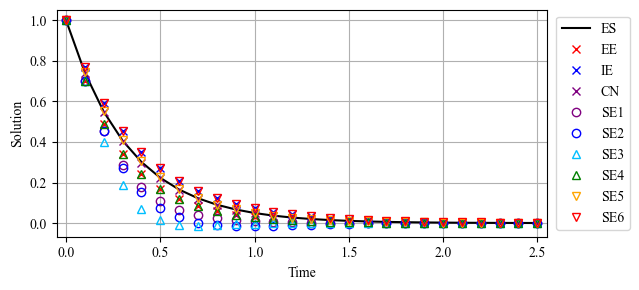

In [5]:
t_0 = 0.0
T = 2.5
h = 0.1
max_iter = 1000

def F(t, u):
    return -3*u 

def exact_sol(t):
    return np.exp(-3*t)

def u_0(t_0):
    return exact_sol(t_0)

result_EE = specular.ode.solver.classical_scheme(F, t_0=t_0, u_0=u_0, T=T, h=h, form="explicit Euler").history()
result_IE = specular.ode.solver.classical_scheme(F, t_0=t_0, u_0=u_0, T=T, h=h, form="implicit Euler").history()
result_CN = specular.ode.solver.classical_scheme(F, t_0=t_0, u_0=u_0, T=T, h=h, form="Crank-Nicolson").history()

exact_values = np.array([exact_sol(t) for t in result_EE[0]])

plt.figure(figsize=(6.5, 3))

plt.plot(result_EE[0], exact_values, color='black', label='ES')
plt.plot(result_EE[0], result_EE[1],  marker='x', linestyle='None', markerfacecolor='none', markeredgecolor='red', label='EE') 
plt.plot(result_IE[0], result_IE[1],  marker='x', linestyle='None', markerfacecolor='none', markeredgecolor='blue', label='IE')  
plt.plot(result_CN[0], result_CN[1],  marker='x', linestyle='None', markerfacecolor='none', markeredgecolor='purple', label='CN')  

colors = ['purple', 'blue', 'deepskyblue', 'green', 'orange', 'red']
markers = ['o', 'o', '^', '^', 'v', 'v']

for i in range(1, 7):
    result = specular.Euler_scheme(of_Type=i, F=F, t_0=t_0, u_0=u_0, T=T, h=h).history()
    number_of_circles = max(1, len(result[0]) // 30)
    plt.plot(result[0], result[1], marker=markers[i-1], linestyle='None', markeredgecolor=colors[i-1], markerfacecolor='none', label=f'SE{i}')

plt.xlabel(r"Time", fontsize=10)
plt.ylabel(r"Solution", fontsize=10)
plt.xlim(-0.05, 2.55)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0., fontsize=10)
plt.tight_layout()
plt.savefig(f'figures/ex4.pdf', dpi=1000, bbox_inches='tight')
plt.show()

### Figure 5

Running the specular Euler scheme of Type 6: 100%|██████████| 90/90 [00:00<?, ?it/s]


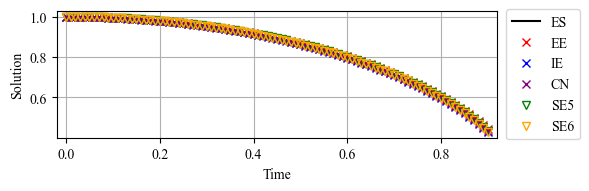

In [6]:
t_0 = 0.0
T = 0.9
h = 0.01
max_iter = 1000

def F(t, u):
    return -(t*u)/(1-t**2)

def exact_sol(t):
    return np.sqrt(1 - t**2)
    
def u_0(t_0):
    return exact_sol(t_0)

result_EE = specular.ode.solver.classical_scheme(F, t_0=t_0, u_0=u_0, T=T, h=h, form="explicit Euler").history()
result_IE = specular.ode.solver.classical_scheme(F, t_0=t_0, u_0=u_0, T=T, h=h, form="implicit Euler").history()
result_CN = specular.ode.solver.classical_scheme(F, t_0=t_0, u_0=u_0, T=T, h=h, form="Crank-Nicolson").history()

exact_values = np.array([exact_sol(t) for t in result_EE[0]])

plt.figure(figsize=(6., 2))

plt.plot(result_EE[0], exact_values, color='black', label='ES')
plt.plot(result_EE[0], result_EE[1],  marker='x', linestyle='None', markerfacecolor='none', markeredgecolor='red', label='EE') 
plt.plot(result_IE[0], result_IE[1],  marker='x', linestyle='None', markerfacecolor='none', markeredgecolor='blue', label='IE')  
plt.plot(result_CN[0], result_CN[1],  marker='x', linestyle='None', markerfacecolor='none', markeredgecolor='purple', label='CN')  

colors = ['green', 'orange']
markers = ['v', 'v']

for i in range(1, 3):
    result = specular.Euler_scheme(of_Type=i+4, F=F, t_0=t_0, u_0=u_0, T=T, h=h).history()
    number_of_circles = max(1, len(result[0]) // 30)
    plt.plot(result[0], result[1], marker=markers[i-1], linestyle='None', markeredgecolor=colors[i-1], markerfacecolor='none', label=f'SE{i+4}')

plt.xlabel(r"Time", fontsize=10)
plt.ylabel(r"Solution", fontsize=10)
plt.xlim(-0.02, 0.92)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0., fontsize=10)
plt.tight_layout()
plt.savefig(f'figures/ex5.pdf', dpi=1000, bbox_inches='tight')
plt.show()

### Figure 6

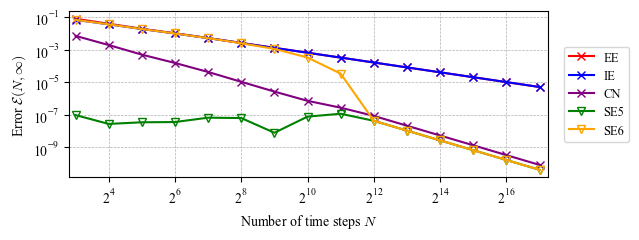

In [7]:
def F(t, u):
    return -(t*u)/(1-t**2)

def exact_sol(t):
    return np.sqrt(1 - t**2)

error_analysis(example=1, norm='max', F=F, t_0=0.0, T=0.9, exact_sol=exact_sol)

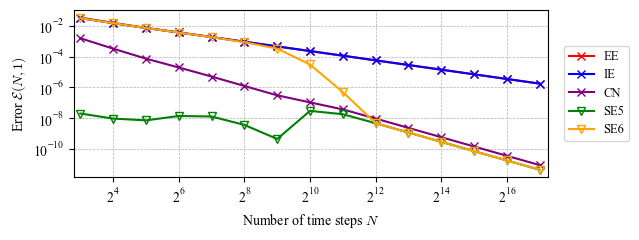

In [8]:
error_analysis(example=1, norm='l1', F=F, t_0=0.0, T=0.9, exact_sol=exact_sol)

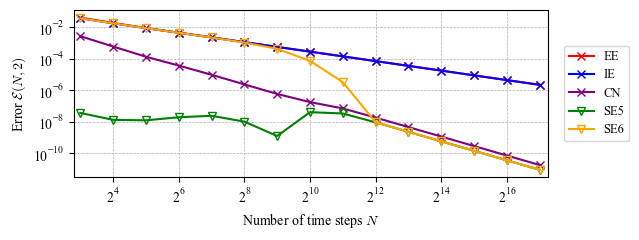

In [9]:
error_analysis(example=1, norm='l2', F=F, t_0=0.0, T=0.9, exact_sol=exact_sol)

### Figure 7

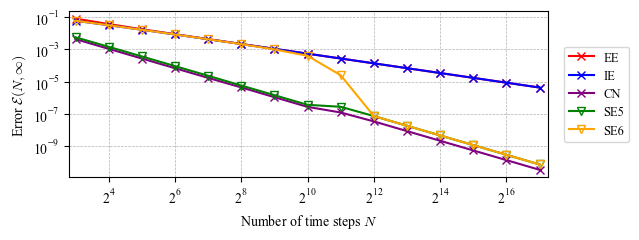

In [10]:
def F(t, u):
    return -3*u 

def exact_sol(t):
    return np.exp(-3*t)

error_analysis(example=2, norm='max', F=F, t_0=0.0, T=2.5, exact_sol=exact_sol)

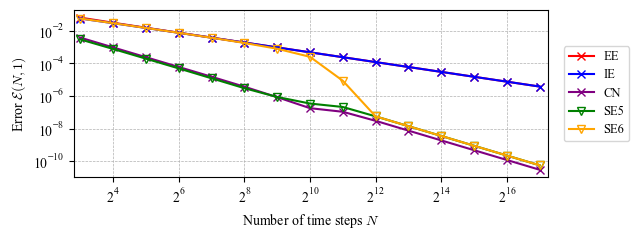

In [11]:
error_analysis(example=2, norm='l1', F=F, t_0=0.0, T=2.5, exact_sol=exact_sol)

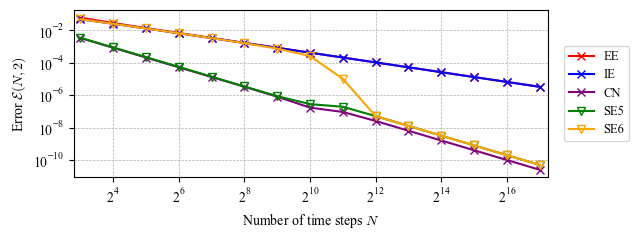

In [12]:
error_analysis(example=2, norm='l2', F=F, t_0=0.0, T=2.5, exact_sol=exact_sol)

### Figure 9

In [13]:
c = 0.3

def F(t, u):
    if t < 0:
        return -3*u 
    elif t > 0:
        return -3*u + 3*t + 1
    elif t == 0 and c == 1/6:
        return 1/2
    elif t == 0 and c != 1/6:
        return specular.A(1 - 3*c, -3*c) + 3*c
    
def exact_sol(t):
    t = np.asarray(t)
    return np.where(
        t < 0,
        c * np.exp(-3 * t),
        t + c * np.exp(-3 * t)
    )



Running the specular Euler scheme of Type 6: 100%|██████████| 34/34 [00:00<00:00, 32565.96it/s]


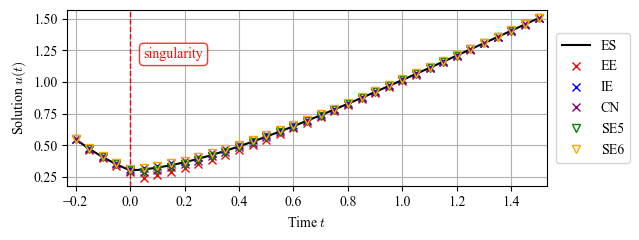

In [14]:

import specular
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from typing import List, Tuple, Optional
import matplotlib

matplotlib.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "Times New Roman"

t_0 = -0.2
T = 1.5
h = 0.05
max_iter = 1000
u_0_val = exact_sol(t_0)

res_EE = specular.ode.classical_scheme(F=F, u_0=u_0_val, t_0=t_0, T=T, h=h, form="explicit Euler")
res_IE = specular.ode.classical_scheme(F=F, u_0=u_0_val, t_0=t_0, T=T, h=h, form="implicit Euler")
res_CN = specular.ode.classical_scheme(F=F, u_0=u_0_val, t_0=t_0, T=T, h=h, form="Crank-Nicolson")
res_S5 = specular.Euler_scheme(of_Type=5, F=F, t_0=t_0, u_0=u_0_val, T=T, h=h, max_iter=1000)
res_S6 = specular.Euler_scheme(of_Type=6, F=F, t_0=t_0, u_0=u_0_val, T=T, h=h, max_iter=1000)

exact_solution = np.array([exact_sol(t) for t in res_EE.history()[0]])

plt.figure(figsize=(6.5, 2.5))

plt.axvline(x=0.0, color='red', linestyle='--', linewidth=1)

plt.plot(res_EE.history()[0], exact_solution, color='black', label='ES') 

ymin, ymax = plt.ylim()
dy = ymax - ymin

plt.text(0.05, ymax - 0.22 * dy, "singularity", color='red', fontsize=10,
         rotation=0, ha='left', va='top',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='red', boxstyle='round,pad=0.3'))

plt.plot(res_EE.history()[0], res_EE.history()[1],  marker='x', linestyle='None',
         markerfacecolor='none', 
         markeredgecolor='red',  
         label='EE') 

plt.plot(res_IE.history()[0], res_IE.history()[1],  marker='x', linestyle='None',
         markerfacecolor='none',  
         markeredgecolor='blue',  
         label='IE')  

plt.plot(res_CN.history()[0], res_CN.history()[1],  marker='x', linestyle='None',
         markerfacecolor='none',  
         markeredgecolor='purple',
         label='CN')  

plt.plot(res_S5.history()[0], res_S5.history()[1],  marker='v', linestyle='None',
         markerfacecolor='none',  
         markeredgecolor='green',
         label='SE5')

plt.plot(res_S6.history()[0], res_S6.history()[1],  marker='v', linestyle='None',
         markerfacecolor='none',  
         markeredgecolor='orange',  
         label='SE6')


plt.xlabel(r"Time $t$", fontsize=10)
plt.ylabel(r"Solution $u(t)$", fontsize=10)
plt.xlim(-0.23, 1.53)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0., fontsize=10)
plt.tight_layout()
plt.savefig('figures/ex6.pdf', dpi=1000, bbox_inches='tight')
plt.show()

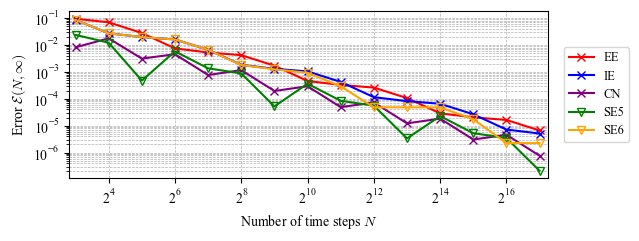

In [15]:
error_analysis(example=3, norm='max', F=F, t_0=-0.2, T=1.5, exact_sol=exact_sol)

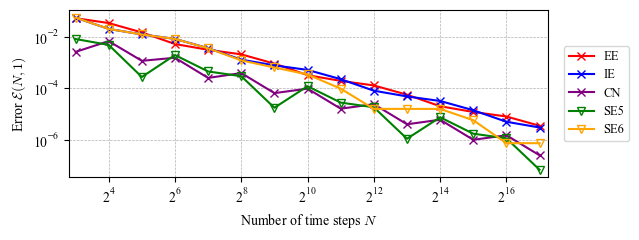

In [16]:
error_analysis(example=3, norm='l1', F=F, t_0=-0.2, T=1.5, exact_sol=exact_sol)

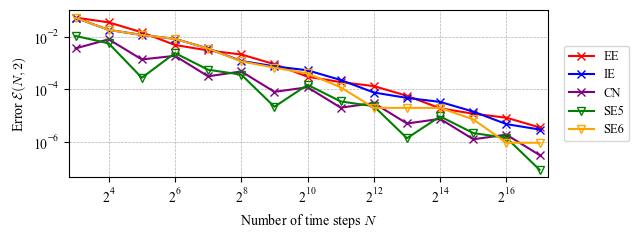

In [17]:
error_analysis(example=3, norm='l2', F=F, t_0=-0.2, T=1.5, exact_sol=exact_sol)